<a href="https://colab.research.google.com/github/rushikesh648/pw-skills-assignment/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# q21 Train a KNN Classifier on the Iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [4]:
# q22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.007999999999999997


In [5]:
# q23  Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print("Accuracy with Euclidean Distance:", accuracy_euclidean)

Accuracy with Euclidean Distance: 1.0


Accuracy with K = 3 : 1.0


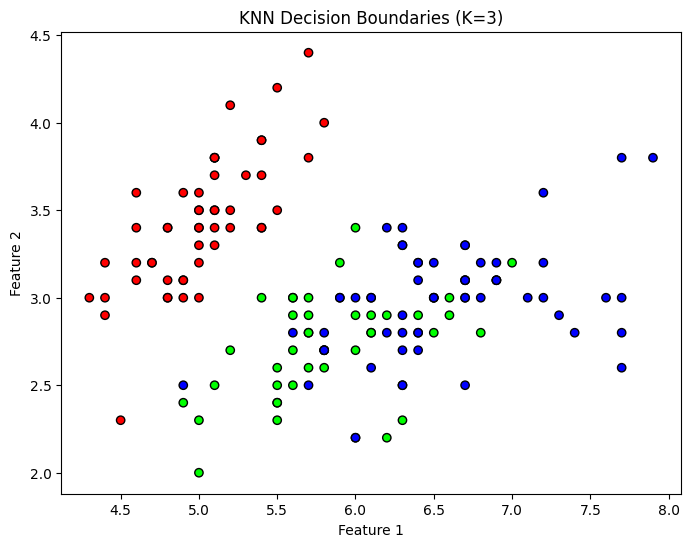

Accuracy with K = 5 : 1.0


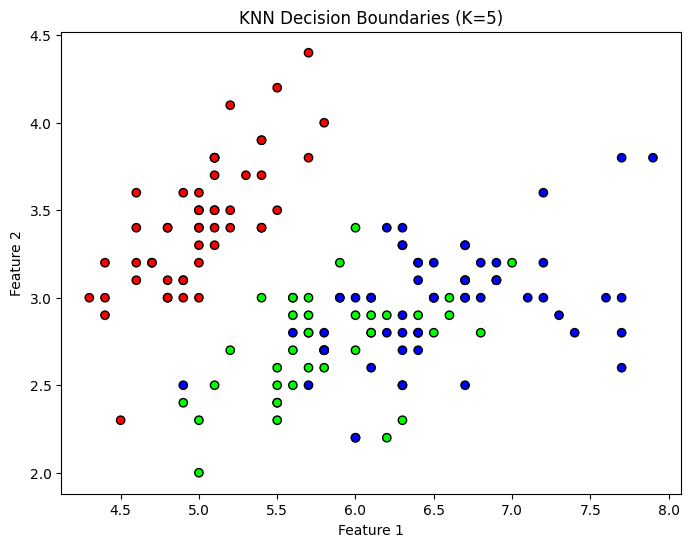

Accuracy with K = 7 : 0.9666666666666667


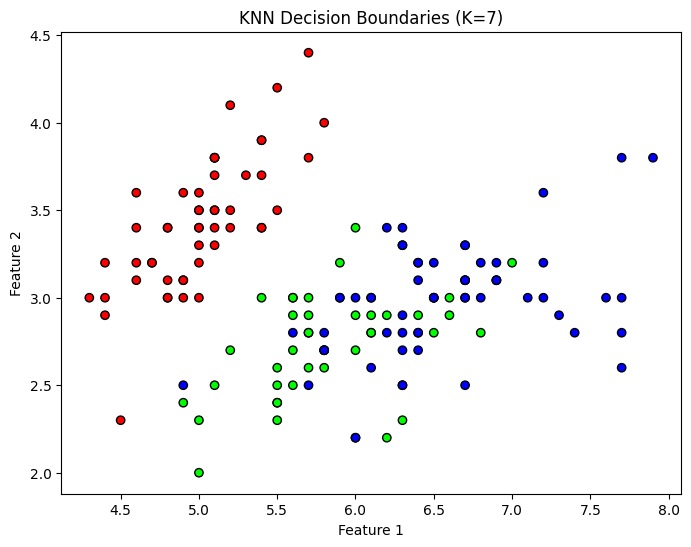

Accuracy with K = 9 : 1.0


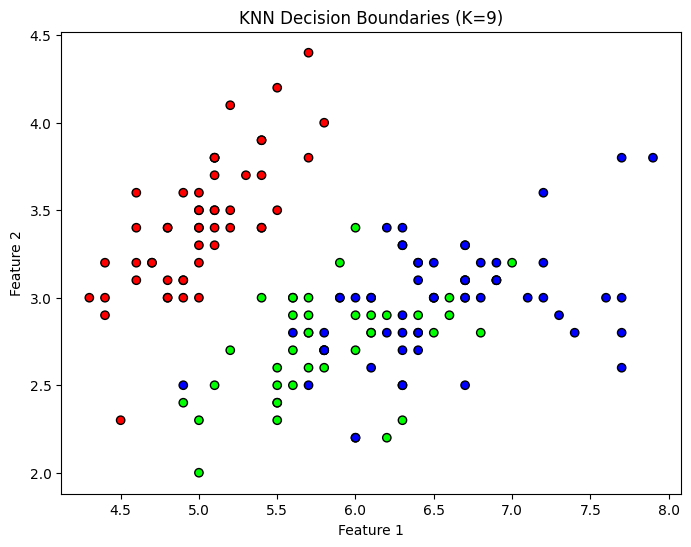

In [6]:
# q24 Train a KNN Classifier with different values of K and visualize decision boundaried.

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9]
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy with K =", k, ":", accuracy)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.title(f'KNN Decision Boundaries (K={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [8]:
# q25 Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy with Unscaled Data:", accuracy_unscaled)

Accuracy with Unscaled Data: 1.0


In [9]:
# q26 Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.92461872 0.05306648]


In [10]:
# q27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)
y_pred_pca = knn_pca.predict(X_pca)
accuracy_pca = accuracy_score(y, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

Accuracy with PCA: 0.98


In [11]:
# q28  Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9583333333333334
Test Set Accuracy: 1.0


In [12]:
# q29 Train a KNN Classifier and check the number of misclassified samples.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

misclassified_samples = X_test[y_pred != y_test]
num_misclassified = len(misclassified_samples)

print("Number of Misclassified Samples:", num_misclassified)

Number of Misclassified Samples: 9


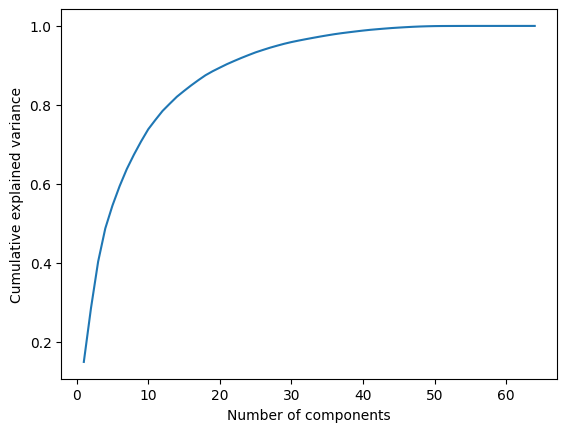

In [13]:
# q30 Train a PCA model and visualize the cumulative explained variance.
import numpy as np
pca = PCA()
pca.fit(digits.data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [14]:
# q31 Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
print("Accuracy with uniform weights:", accuracy_uniform)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)
print("Accuracy with distance weights:", accuracy_distance)

Accuracy with uniform weights: 0.98
Accuracy with distance weights: 0.98


In [16]:
# q32 Train a KNN Regressor and analyze the effect of different K values on performance.

knn_k3 = KNeighborsRegressor(n_neighbors=3)
knn_k3.fit(X_train, y_train)
y_pred_k3 = knn_k3.predict(X_test)
mse_k3 = mean_squared_error(y_test, y_pred_k3)
print("Mean Squared Error with K=3:", mse_k3)

knn_k5 = KNeighborsRegressor(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
mse_k5 = mean_squared_error(y_test, y_pred_k5)
print("Mean Squared Error with K=5:", mse_k5)

knn_k7 = KNeighborsRegressor(n_neighbors=7)
knn_k7.fit(X_train, y_train)
y_pred_k7 = knn_k7.predict(X_test)
mse_k7 = mean_squared_error(y_test, y_pred_k7)
print("Mean Squared Error with K=7:", mse_k7)

Mean Squared Error with K=3: 0.16666666666666663
Mean Squared Error with K=5: 0.27813333333333334
Mean Squared Error with K=7: 0.3692063492063492


In [31]:
# q33  Implement KNN Imputation for handling missing values in a dataset.
from math import nan
from sklearn.impute import KNNImputer
import pandas as pd
data = {'age': [1.0, 2.0, 3.0, 4.0, 5.0, nan , 7.0, nan, 9.0, 10.0],
        'pclass': [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, nan, 18.0, 19.0, 20.0]}
data = pd.DataFrame(data)
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(data)
print(X_imputed)

for i in range(len(X_imputed)):
    print(X_imputed[i])


[[ 1.  11. ]
 [ 2.  12. ]
 [ 3.  13. ]
 [ 4.  14. ]
 [ 5.  15. ]
 [ 4.5 16. ]
 [ 7.  17. ]
 [ 9.5 18. ]
 [ 9.  19. ]
 [10.  20. ]]
[ 1. 11.]
[ 2. 12.]
[ 3. 13.]
[ 4. 14.]
[ 5. 15.]
[ 4.5 16. ]
[ 7. 17.]
[ 9.5 18. ]
[ 9. 19.]
[10. 20.]


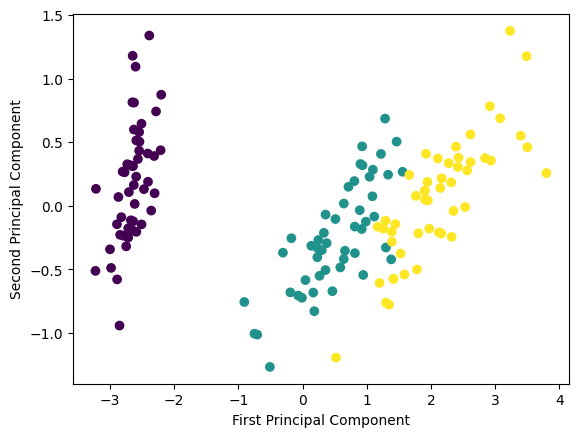

In [33]:
# q34 Train a PCA model and visualize the data projection onto the first two principal components.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()



In [37]:
# q35 Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

from sklearn.neighbors import KDTree, BallTree

kd_tree = KDTree(X_train)
ball_tree = BallTree(X_train)

indices_kd = kd_tree.query(X_test, k=5)
indices_ball = ball_tree.query(X_test, k=5)

knn_kd = KNeighborsClassifier(n_neighbors=5)
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)
accuracy_kd = accuracy_score(y_test, y_pred_kd)
print("Accuracy with KD Tree:", accuracy_kd)

knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
y_pred_ball = knn_ball.predict(X_test)
accuracy_ball = accuracy_score(y_test, y_pred_ball)
print("Accuracy with Ball Tree:", accuracy_ball)

Accuracy with KD Tree: 0.98
Accuracy with Ball Tree: 0.98


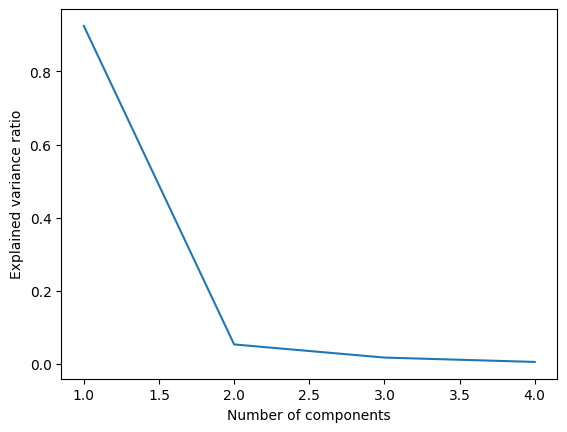

In [39]:
# q36 Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [40]:
# q37 Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
from sklearn.metrics import precision_score, recall_score, f1_score
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [41]:
# q38 Train a PCA model and analyze the effect of different numbers of components on accuracy.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)
y_pred_pca = knn_pca.predict(X_pca)
accuracy_pca = accuracy_score(y, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

Accuracy with PCA: 0.98


In [42]:
# q39 Train a KNN Classifier with different leaf_size values and compare accuracy.

leaf_size_values = [10, 20, 30, 40, 50]
for leaf_size in leaf_size_values:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy with leaf_size =", leaf_size, ":", accuracy)

Accuracy with leaf_size = 10 : 1.0
Accuracy with leaf_size = 20 : 1.0
Accuracy with leaf_size = 30 : 1.0
Accuracy with leaf_size = 40 : 1.0
Accuracy with leaf_size = 50 : 1.0


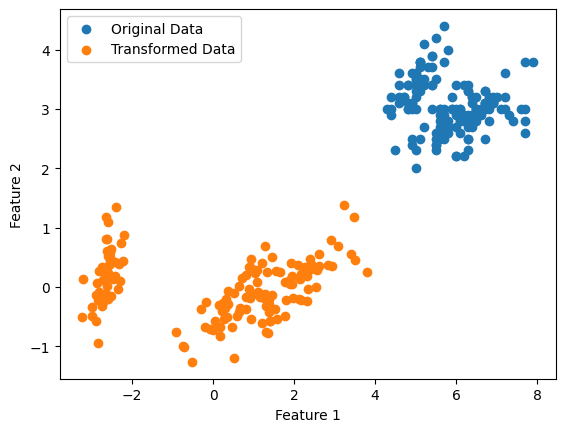

In [43]:
# q40 Train a PCA model and visualize how data points are transformed before and after PCA.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Transformed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [44]:
# q41 Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [46]:
# q42 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print("Mean Squared Error with Manhattan Distance:", mse_manhattan)

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_euclidean = knn.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print("Mean Squared Error with Euclidean Distance:", mse_euclidean)

Mean Squared Error: 0.007999999999999997
Mean Squared Error with Manhattan Distance: 0.0053333333333333306
Mean Squared Error with Euclidean Distance: 0.007999999999999997


In [47]:
# q43 Train a KNN Classifier and evaluate using ROC-AUC score.

from sklearn.metrics import roc_auc_score
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_proba = knn.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


Text(0, 0.5, 'cumulative explained variance')

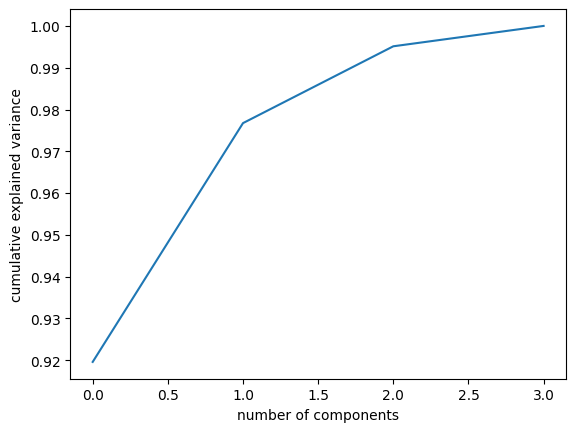

In [49]:
# q44 Train a PCA model and visualize the variance captured by each principal component.

pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [51]:
# q45  Train a KNN Classifier and perform feature selection before training.
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore")
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Feature Selection:", accuracy)

Accuracy with Feature Selection: 1.0


Reconstruction Error: 0.02534107393239825


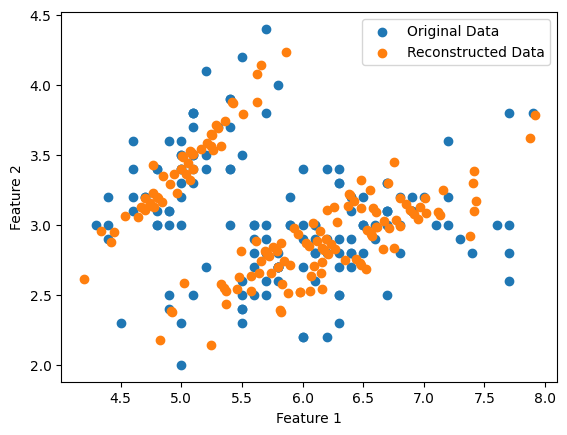

In [52]:
# q46 Train a PCA model and visualize the data reconstruction error after reducing dimensions.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print("Reconstruction Error:", reconstruction_error)
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], label='Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Accuracy: 1.0


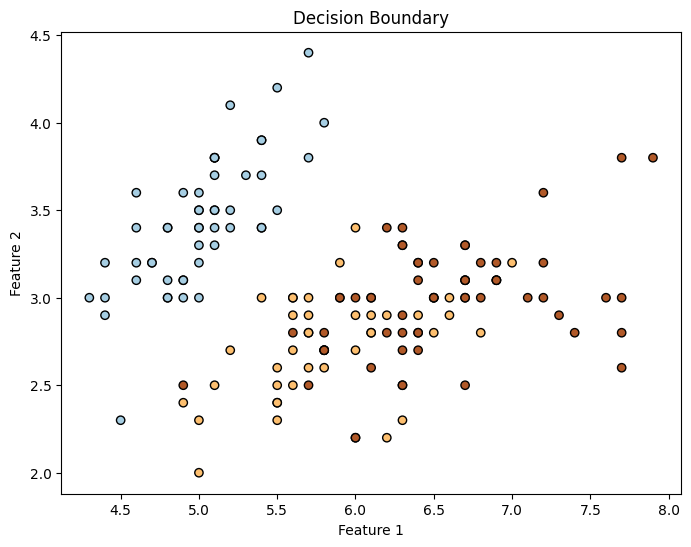

In [53]:
# q47 Train a KNN Classifier and visualize the decision boundary.

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

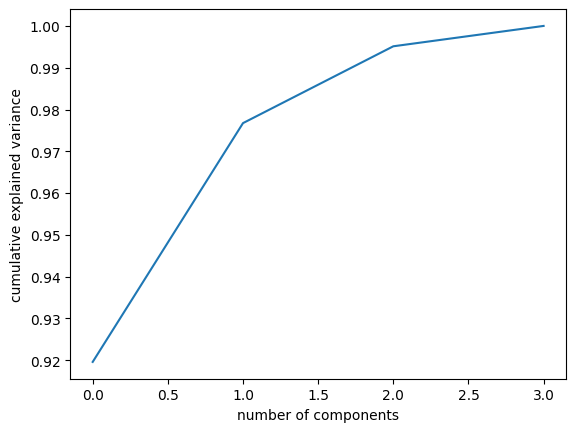

In [54]:
# q48 Train a PCA model and analyze the effect of different numbers of components on data variance.

pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

q1. What is K-Nearest Neighbors (KNN) and how does it work?

ans: The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method used for both classification and regression tasks.

How KNN Works:

Selecting the optimal value of K: K represents the number of nearest neighbors to consider while making a prediction.

Calculating distance: The similarity between the target and training data points is measured using distance metrics such as Euclidean distance.

q2. What is the difference between KNN Classification and KNN Regression?

ans: In classification tasks, the user seeks to predict a category.

In regression tasks, the user wants to output a numerical value.

q3. What is the role of the distance metric in KNN?

ans: It works by calculating the distance of 1 test observation from all the observation of the training dataset and then finding K nearest neighbors of it.

q4. What is the Curse of Dimensionality in KNN?

ans: high dimensional spaces distances between nearest and farthest points from query points become almost equal.

q5.  How can we choose the best value of K in KNN?

ans: The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data.

q6. What are KD Tree and Ball Tree in KNN?

ans: A KD-Tree (K-Dimensional Tree) is a space-partitioning data structure used to organize points in a k-dimensional space.

similar to KD Tree, in the Ball Tree the total space of training data is divided into multiple balls (circular blocks).

q7. When should you use KD Tree vs. Ball Tree?

ans: These methods are particularly useful when dealing with high-dimensional or large datasets.

q8. What are the disadvantages of KNN?

ans: Computationally expensive, especially for large datasets.

Sensitive to outliers, which can significantly affect its performance.

q9.  How does feature scaling affect KNN?

ans: Without feature scaling, features with larger ranges can dominate the distance calculations, leading to biased results.

q10. What is PCA (Principal Component Analysis)?

ans: Principal component analysis is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.

q11.  How does PCA work?

ans: extracting only the important variables and then creating new uncorrelated ones to maximize variance, PCA helps to tackle issues like the curse of dimensionality and over-fitting, among others.

q12.  What is the geometric intuition behind PCA?

ans: its applications in machine learning, and how it helps in feature extraction and selection, ultimately enhancing model performance.

q13. What is the difference between Feature Selection and Feature Extraction?

ans: feature selection:involves selecting a subset of the most relevant features that are actually contributing in prediction while discarding the rest features.

feature extraction:transforms existing features into a new set of features that captures better underlying patterns in data.

q14.  What are Eigenvalues and Eigenvectors in PCA?

ans: In PCA, the eigenvectors and eigenvalues are calculated from the covariance matrix (the source of information about data variation) using the method called eigendecomposition.

q15.  How do you decide the number of components to keep in PCA?

ans: The eigenvalue \lambda_i represents the variance of the data along the direction of the corresponding principal component. Hence the components with the lowest eigenvalues contain the least information, so they can be dropped.

q16. Can PCA be used for classification?

ans: PCA is not a classifier.

q17.  What are the limitations of PCA?

ans: 1.Linear Assumption: PCA assumes linear relationships among variables, making it less effective for non-linear data structures.

2.
Sensitivity to Scale: PCA is sensitive to the scale of the variables, which can affect the results if the data is not standardized.

q18. How do KNN and PCA complement each other?

ans: PCA and a KNN in order to transform some of the negative observations into positive ones and improve the quality of our machine learning model.

q19.  How does KNN handle missing values in a dataset?

ans: with a missing value and imputing the missing value using the mean or median of the neighboring data points.

q20.  What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

ans: The disparity between the data groups is modeled by the LDA, while the PCA does not detect such a disparity between groups.